In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
plt.style.use("ggplot")
sns.set_palette("Set2")

# Step 2: Load dataset
df = pd.read_csv("Netflix Dataset.csv")

# Step 3: Quick look
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# Shape & column info
print("Shape of dataset:", df.shape)
print("\nColumn info:")
print(df.info())

# Missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Shape of dataset: (7789, 11)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

Missing values per column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description       

In [3]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values (example: fill NA with 'Unknown')
df['Director'].fillna("Unknown", inplace=True)
df['Cast'].fillna("Unknown", inplace=True)
df['Country'].fillna("Unknown", inplace=True)

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract release year
df['Release_Year'] = df['Release_Date'].dt.year

# Clean Duration column (split into number + unit)
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Unit'] = df['Duration'].str.extract('([a-zA-Z]+)')

In [4]:
# Count of Movies vs TV Shows
print(df['Type'].value_counts())

# Distribution of release years
print(df['Release_Year'].value_counts().sort_index())

# Top countries
print(df['Country'].value_counts().head(10))

# Top genres/categories
print(df['Category'].value_counts().head(10))

Type
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 492, dtype: int64

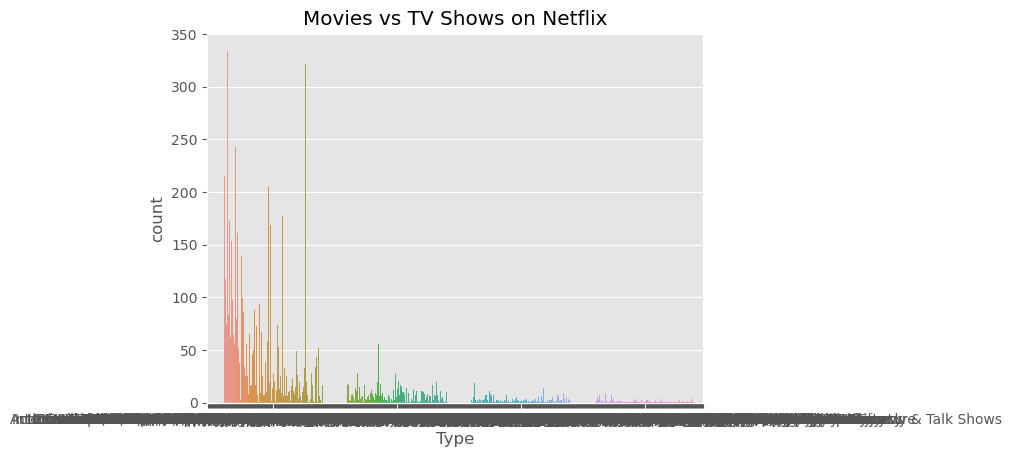

In [5]:
sns.countplot(x="Type", data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

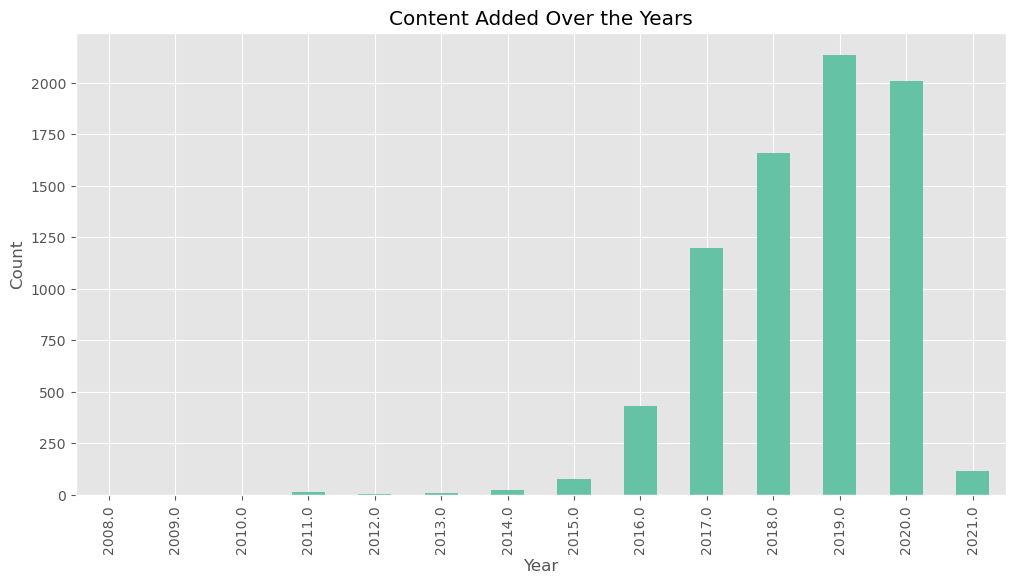

In [6]:
df['Release_Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

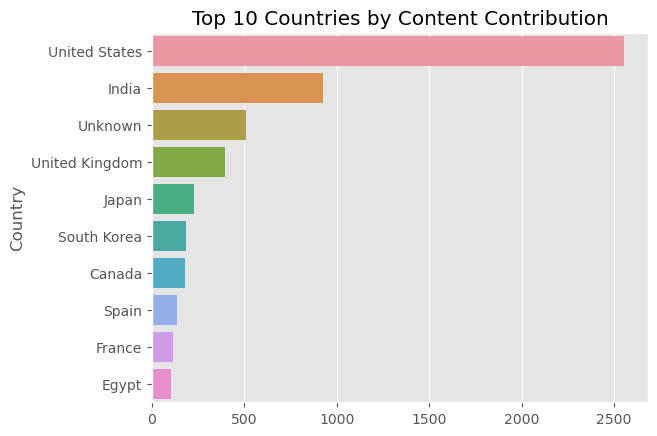

In [7]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content Contribution")
plt.show()

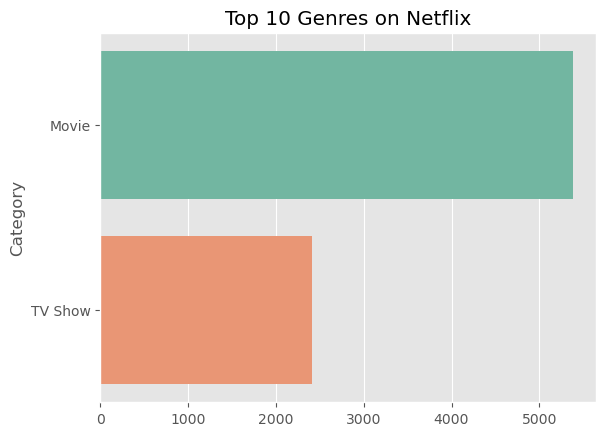

In [8]:
top_genres = df['Category'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.show()

In [9]:
print("✅ Insights:")
print("- Movies dominate over TV shows OR vice versa (see chart above).")
print("- Content production increased significantly after 2015 (trend plot).")
print("- USA, India, and UK are top contributors (country bar chart).")
print("- Genres like Drama, Comedy, and Documentaries are most common (genre bar chart).")
print("- Netflix should focus on underrepresented genres or regions for growth.")

✅ Insights:
- Movies dominate over TV shows OR vice versa (see chart above).
- Content production increased significantly after 2015 (trend plot).
- USA, India, and UK are top contributors (country bar chart).
- Genres like Drama, Comedy, and Documentaries are most common (genre bar chart).
- Netflix should focus on underrepresented genres or regions for growth.
